In [1]:
using IFSintegrals, Plots;

Set the physical problem parameters:

In [2]:
Γ = CantorSet() # scattering obstacle
k = 20 # wavenumber
d = [1, 1]/sqrt(2); # incident wave direction

Set the problem parameters:

In [3]:
h_bem = 0.005 # meshwidth for BEM
h_quad = 0.001; # meshwidth for quadrature

Approximate the problem as a BIE and solve:

In [8]:
S = SingleLayerOperatorHelmholtz(Γ, k; ambient_dimension=2) # BIO
Sₕ = DiscreteSIO(S;h_mesh = h_bem, h_quad = h_quad) # discretised BIO
f(x) = exp(im*k*(d[1]*x[1])) # RHS data
ϕₕ = Sₕ\f; # discrete solution

Now plot the solution

In [9]:
uⁱ(x) = exp(im*k*(d'*x))
h□ = 0.01 # adujust this for more acurate / faster plots
x₁ = -1:h□:2
x₂ = -1:h□:1
X = [[x₁_,x₂_] for x₁_∈x₁, x₂_∈x₂]
Sₖϕₕ = single_layer_potential(ϕₕ,k)
uˢ(x) = -Sₖϕₕ(x)
uᵗ = uⁱ.(X) + uˢ.(X);

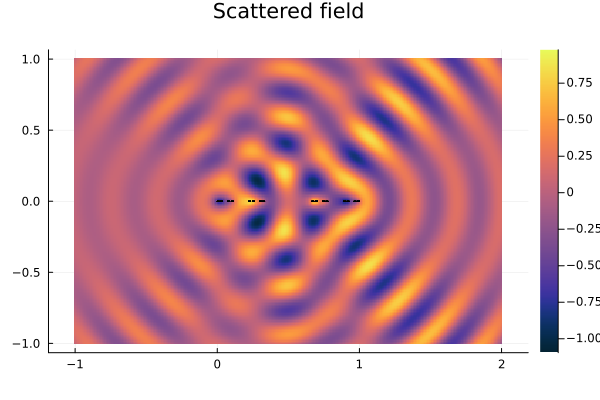

In [14]:
heatmap(x₁,x₂,transpose(real(uˢ.(X))),  aspect_ratio = 1, 
    title="Scattered field", legend=true, c = :thermal)
plot!(Γ,color = "white", markersize=0.02, legend=false)